In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from Functions.Exact_Solver import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
n = 5
L = 5
J = 1e-5
mu = 3.5

@jit(nopython=True)
def U_func(x):
    return 1

@jit(nopython=True)
def V_func(x):
    return (x - L/2 - 1/2)**2

@jit(nopython=True)
def n0_func(x):
    return (mu-V_func(x))/U_func(x) + 1/2

In [71]:
H,E,psi,k,uncond_prob0 = diagonalize(n,L,J,U_func,V_func,mu)

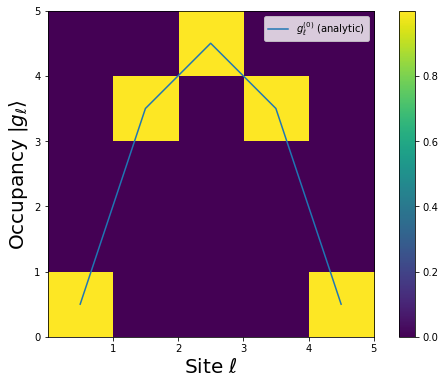

In [72]:
fig, ax = plot_result(uncond_prob0, n, L)
x = linspace(1,L,L)
n0 = n0_func(x)
ax.plot(linspace(1/2, L-1/2, L), n0+1/2)
ax.legend([r"$g_{\ell}^{(0)}$ (analytic)"])
fig.savefig("Unperturbed_gs.jpg")

In [73]:
J = 0.5

In [74]:
H,E,psi,k,uncond_prob1 = diagonalize(n,L,J,U_func,V_func,mu)

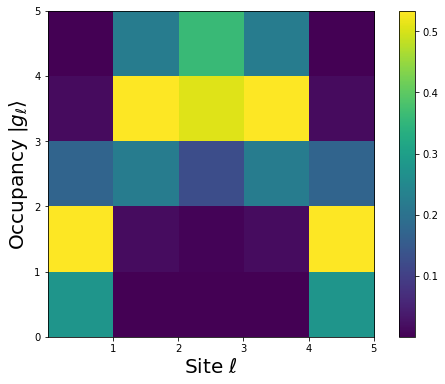

In [75]:
fig, ax = plot_result(uncond_prob1, n, L)
x = linspace(1,L,L)
fig.savefig("Perturbed_gs.jpg")